In [1]:
import numpy as np
import pandas as pd
from IPython.display import Image

print('Версия pandas:', pd.__version__)

Версия pandas: 2.1.4


# Получение и подсчет уникальных значений.

# Методы unique(), value_counts(), nunique(), mode(), describe()

    План урока
    
    ЧАСТЬ 1
    
    pd.Series.unique()
    pd.Series.value_counts()
    pd.Series.nunique() + pd.DataFrame.nunique()
    Получение списка (list) уникальных значений
    Получение количества (частоты) каждого уникального значения
    Получение словаря (dict) уникальных значений и их количества
    
    ЧАСТЬ 2
    
    Понятие моды в статистике
    Получение модального значения и его частоты
    Мода в value_counts()
    Метод mode()
    Метод describe()


# Часть 1

    pd.Series.unique() возвращает уникальные значения в виде массива NumPy (ndarray)
    
    pd.Series.value_counts() возвращает уникальные значения и их количество в виде Series
    
    pd.Series.nunique() и pd.DataFrame.nunique() возвращают количество уникальных значений в виде int или Series

In [2]:
df = pd.read_csv('files/sample_1.csv')
df.iloc[1] = float('nan')
display(df)

,name,age,state,point
0,Alice,24.0,NY,64.0
1,NaN,NaN,NaN,NaN
2,Charlie,18.0,CA,70.0
3,Dave,68.0,TX,70.0
4,Ellen,24.0,CA,88.0
5,Frank,30.0,NY,57.0


# pd.Series.unique()

In [3]:
# Метод unique() возвращает уникальные значения в виде одномерного массива ndarray
# Значения располагаются в порядке появления

print(df['state'].unique())

print(type(df['state'].unique()))

['NY' nan 'CA' 'TX']
<class 'numpy.ndarray'>


# pd.Series.value_counts()

In [4]:
# Метод value_counts() возвращает серию, 
# Уникальные значения являются метками-индексами вернувшейся серии, а их количество - значениями.

display(df['state'].value_counts(),
        type(df['state'].value_counts()))

state
NY    2
CA    2
TX    1
Name: count, dtype: int64

pandas.core.series.Series

#### value_counts() и аргумент dropna=False

In [5]:
df['state'].value_counts(dropna=False)

state
NY     2
CA     2
NaN    1
TX     1
Name: count, dtype: int64

#### value_counts() и аргумент ascending=True

In [6]:
# По умолчанию значения сортируются в порядке убывания частоты
# Если аргумент ascending имеет значение True, они сортируются в порядке возрастания

df['state'].value_counts(dropna=False, ascending=True)

state
NaN    1
TX     1
NY     2
CA     2
Name: count, dtype: int64

#### value_counts() и аргумент sort=False

In [7]:
# если задать аргумент sort в False, значения останутся без сортировки и будут расположены в исходном порядке появления

df['state'].value_counts(dropna=False, sort=False)

state
NY     2
NaN    1
CA     2
TX     1
Name: count, dtype: int64

#### value_counts() и аргумент normalize=True

In [8]:
# Если аргумент normalize имеет значение True, значения нормализуются так, чтобы их сумма была равна 1

df['state'].value_counts(normalize=True)

state
NY    0.4
CA    0.4
TX    0.2
Name: proportion, dtype: float64

#### normalize=True, dropna=False

In [9]:
# Будьте внимательны, значение меняется в зависимости от значения аргумента dropna, если в него включен NaN

df['state'].value_counts(normalize=True, dropna=False)

state
NY     0.333333
CA     0.333333
NaN    0.166667
TX     0.166667
Name: proportion, dtype: float64

# Метод nunique()

## pd.Series.nunique()

In [10]:
# Метод nunique() для Series возвращает количество уникальных значений в виде целого числа (int)

print(df['state'].nunique())
print(type(df['state'].nunique()))

3
<class 'int'>


In [11]:
# По умолчанию отсутствующие значения (NaN) исключаются
# Установка аргумента dropna в значение False отсутствующие значения в подсчет

print(df['state'].nunique(dropna=False))

4


## pd.DataFrame.nunique()

In [12]:
# Метод nunique(), примененный к структуре DataFrame возвращает количество уникальных значений для каждого столбца

display(df.nunique(),
        type(df.nunique()))   

name     5
age      4
state    3
point    4
dtype: int64

pandas.core.series.Series

In [13]:
# Подобно Series, метод nunique() для DataFrame также имеет аргумент dropna
# установка аргумента dropna в значение False включает значения NaN в подсчет

df.nunique(dropna=False)

name     6
age      5
state    4
point    5
dtype: int64

In [14]:
# изменение аргумента axis на 1 или 'columns' переключает подсчет на подсчет по строкам

df.nunique(dropna=False, axis='columns')

0    4
1    1
2    4
3    4
4    4
5    4
dtype: int64

# Получение списка (list) уникальных значений

In [15]:
# Метод unique() возвращает уникальные значения в виде массива NumPy (ndarray)
# Такой массив при необходимости может быть преобразован во встроенный в Python список (list)

print(df['state'].unique().tolist())
print(type(df['state'].unique().tolist()))

['NY', nan, 'CA', 'TX']
<class 'list'>


In [16]:
# Вы можете вызвать tolist() по атрибуту index серии, возвращенной функцией value_counts()

print(df['state'].value_counts().index.tolist())
print(type(df['state'].value_counts().index.tolist()))

['NY', 'CA', 'TX']
<class 'list'>


In [17]:
# Также вы можете использовать атрибут values для получения данных в виде массива NumPy (ndarray)

print(df['state'].value_counts().index.values)
print(type(df['state'].value_counts().index.values))

['NY' 'CA' 'TX']
<class 'numpy.ndarray'>


#### Метод unique() всегда считает NaN уникальным значением, но value_counts() позволяет указать, считать ли NaN, с помощью аргумента dropna.

In [18]:
#Метод unique() всегда считает NaN уникальным значением
print(df['state'].unique().tolist())
print()

# Метод value_counts() позволяет указать, считать ли NaN, с помощью аргумента dropna
print(df['state'].value_counts().index.tolist())
print(df['state'].value_counts(dropna=False).index.tolist())

['NY', nan, 'CA', 'TX']

['NY', 'CA', 'TX']
['NY', 'CA', nan, 'TX']


# Получение количества (частоты) каждого уникального значения

In [19]:
vc = df['state'].value_counts()
vc

state
NY    2
CA    2
TX    1
Name: count, dtype: int64

In [20]:
# получаем число повторений каждого уникального значения, обращаясь по метке к серии в переменной vc

print(vc['NY'])

print(vc['TX'])

2
1


#### Извлечение уникального значения и его количества в цикле for с помощью метода items()

In [21]:
type(df['state'].value_counts().items())

zip

In [22]:
for element in df['state'].value_counts().items():
    print(type(element))
    print(element)
    break

<class 'tuple'>
('NY', 2)


In [23]:
for index, value in df['state'].value_counts().items():
    print(index, value)

NY 2
CA 2
TX 1


# Получение словаря уникальных значений и их количества

#### Использование метода to_dict()

In [24]:
d = df['state'].value_counts().to_dict()

print(d)
print(type(d))

{'NY': 2, 'CA': 2, 'TX': 1}
<class 'dict'>


In [25]:
print(d['NY'])

print(d['TX'])

2
1


In [26]:
d.items()

dict_items([('NY', 2), ('CA', 2), ('TX', 1)])

In [27]:
for key, value in d.items():
    print(key, value)

NY 2
CA 2
TX 1


# ЧАСТЬ 2

# Получение наиболее частого значения (моды) и его частоты

#### Мера центральной тенденции в статистике — число, служащее для описания множества значений одним-единственным числом (для краткости). Например, вместо перечисления величин зарплат всех сотрудников организации говорят о средней зарплате. Существует множество мер центральной тенденции, например:
    
#### Арифметическое среднее — сумма всех наблюденных значений, делённая на их количество.
#### Усеченное среднее — арифметическое среднее после удаления установленного (исследователем) процента наибольших и наименьших значений.
#### Медиана — значение, которое делит упорядоченные по возрастанию (убыванию) наблюдения пополам.
#### Мода — наиболее часто встречающееся значение.
    
#### В отличие от среднего и медианы, понятие моды имеет смысл и для номинальных данных. 

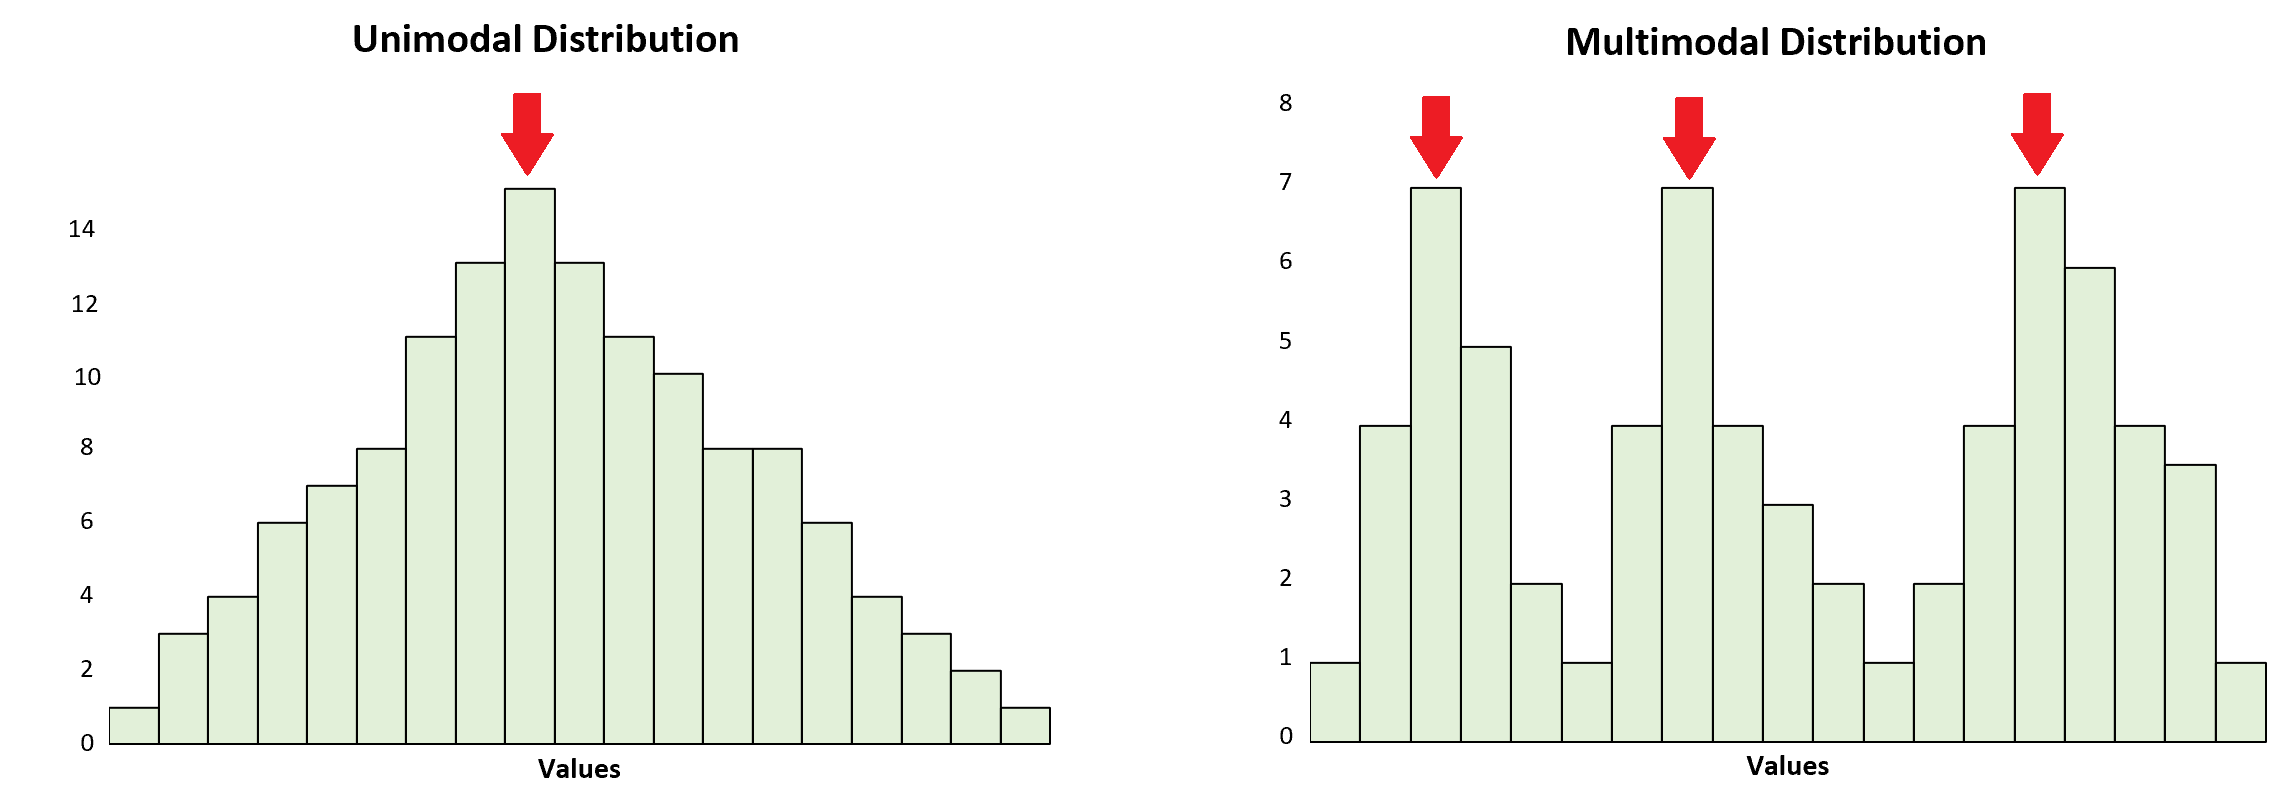

In [28]:
Image("files/mode.png")

#### Мода – это то значение в анализируемой совокупности данных, которое встречается чаще других, поэтому нужно посмотреть на частоты значений и отыскать максимальное из них.

#### Если существуют несколько значений, которые встречаются значительно чаще, чем остальные, то у распределения может образовываться несколько мод (выраженных пиков). Распределение с одной модой называется унимодальным, в противном случае — мультимодальным.

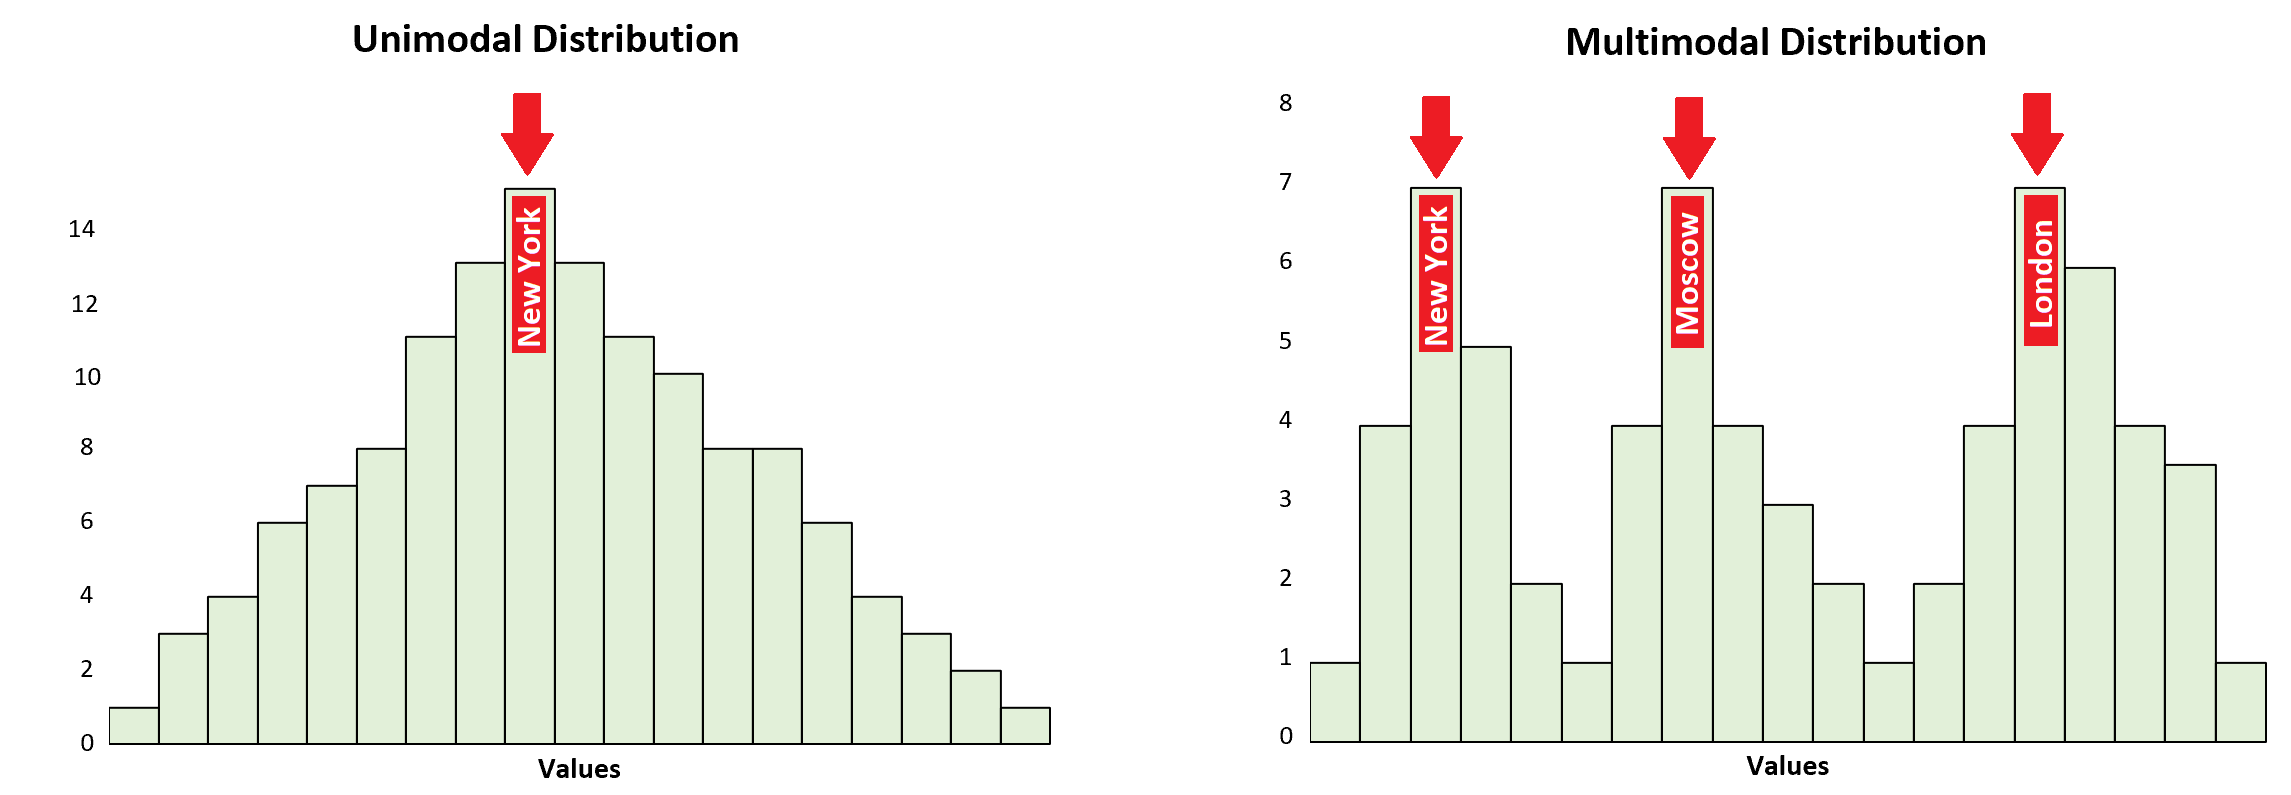

In [29]:
Image("files/mode_city.png")

# Мода в value_counts()

In [30]:
df['state'].value_counts()

state
NY    2
CA    2
TX    1
Name: count, dtype: int64

In [31]:
# получаем первый элемент в индексах серии
print(df['state'].value_counts().index[0])

# получаем первое значение серии (частотность)
print(df['state'].value_counts().iloc[0])

NY
2


In [32]:
df['age'].value_counts()

age
24.0    2
18.0    1
68.0    1
30.0    1
Name: count, dtype: int64

In [ ]:
# print(df['age'].value_counts()[0])
# KeyError: 0

#### Используем метод iat или iloc для доступа к элементу с индексом 0

In [33]:
# вместо iat[] мы также можем использовать iloc[]

print(df['age'].value_counts().iat[0])

print(df['age'].value_counts().iloc[0])

2
2


#### Методы at и iat предназначены для доступа к скаляру, то есть одному элементу структуры, а loc и iloc - для доступа к нескольким элементам одновременно, потенциально для выполнения векторизованных операций (таких операций, которые предполагают одновременную работу с набором значений, то есть с вектором).

# Метод mode()

#### Метод mode() для Series возвращает все имеющиеся модальные значения в виде Series. 

#### Если модальное значение одно, у нас будет серия с одним элементом, если мод несколько, то и значений будет в серии столько

In [34]:
print(df['state'].mode())
print()

print(df['state'].mode().tolist())
print()

print(df['age'].mode().tolist())

0    CA
1    NY
Name: state, dtype: object

['CA', 'NY']

[24.0]


#### Метод mode() + метод tolist() + метод apply()

In [35]:
s_list = df.apply(lambda x: x.mode().tolist())

print(s_list)
print(type(s_list))
print()

print(s_list['name'])
print(type(s_list['name']))


name     [Alice, Charlie, Dave, Ellen, Frank]
age                                    [24.0]
state                                [CA, NY]
point                                  [70.0]
dtype: object
<class 'pandas.core.series.Series'>

['Alice', 'Charlie', 'Dave', 'Ellen', 'Frank']
<class 'list'>


#### Метод mode() структуры DataFrame

In [36]:
df.mode()

,name,age,state,point
0,Alice,24.0,CA,70.0
1,Charlie,NaN,NY,NaN
2,Dave,NaN,NaN,NaN
3,Ellen,NaN,NaN,NaN
4,Frank,NaN,NaN,NaN


# Метод describe()

In [37]:
# из-за настроек по умолчанию получаем статистику по числовым столбцам (по столбцам age и point)

df.describe()

,age,point
count,5.00000,5.000000
mean,32.80000,69.800000
std,20.12958,11.497826
min,18.00000,57.000000
25%,24.00000,64.000000
50%,24.00000,70.000000
75%,30.00000,70.000000
max,68.00000,88.000000


In [38]:
# для преобразования типов используется astype()
# count - это количество значений, 
# unique - это количество уникальных значений, 
# top представляет моду
# freq - это частота модального значения


df.astype('object').describe()

,name,age,state,point
count,5,5.0,5,5.0
unique,5,4.0,3,4.0
top,Alice,24.0,NY,70.0
freq,1,2.0,2,2.0
